# My Data Science Cookbook

This cookbook is a collection of reusable data science recipes developed during this course.
Each recipe addresses a specific data task using real-world data and explains both how the code works and the limitations of the approach.


Name: Tigistu Korga

Personal Data Manifesto & Data Cookbook

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("maternal-mortality ratio.csv")

# adjust if your column names differ
YEAR = "Year"
MMR = "Relative change in maternal mortality ratio since 1990"
COUNTRY = "Entity"
CONTINENT = "Continent"

## Recipe 1: Sanity-check a real-world dataset

**Problem**  
Before analysis, verify structure, types, and missing data.

**Data**  
Maternal mortality dataset.

**Method**  
Inspect schema, summaries, and missing values.


In [4]:
df.info()
df.describe()
df.isna().sum().head()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 5 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Entity                                                  561 non-null    object 
 1   Code                                                    469 non-null    object 
 2   Year                                                    561 non-null    int64  
 3   Relative change in maternal mortality ratio since 1990  458 non-null    float64
 4   Continent                                               285 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 22.0+ KB


,Entity,Code,Year,Relative change in maternal mortality ratio since 1990,Continent
0,Abkhazia,OWID_ABK,2015,NaN,Asia
1,Afghanistan,AFG,1990,0.000000,NaN
2,Afghanistan,AFG,2015,-70.447761,Asia
3,Akrotiri and Dhekelia,OWID_AKD,2015,NaN,Asia
4,Albania,ALB,1990,0.000000,NaN


**Notes**  
These checks reveal data types, missingness, and implausible values early.

**Limits**  
This step validates usability, not meaning or causality.


## Recipe 2: Prepare numeric columns for analysis

**Problem**  
Analysis fails if key variables are not numeric or contain missing values.

**Method**  
Convert year and MMR to numeric and filter usable rows.


In [5]:
MMR = "Relative change in maternal mortality ratio since 1990"
df[YEAR] = pd.to_numeric(df[YEAR], errors="coerce")
df[MMR] = pd.to_numeric(df[MMR], errors="coerce")

df_clean = df.dropna(subset=[YEAR, MMR])
len(df), len(df_clean)

(561, 458)

In [6]:
# Pandas dataframe on the changes in the child mortality rate data imported from Our World In Data
#to create a dataframe you would need a csv file for it to read and construct a table representation of it.
#the syntax include: pd.read_csv('')

mortality_df= pd.read_csv("maternal-mortality ratio.csv").dropna() #dropna() drops all the Null values to avoid confusion and also clean data.
mortality_df

,Entity,Code,Year,Relative change in maternal mortality ratio since 1990,Continent
2,Afghanistan,AFG,2015,-70.447761,Asia
5,Albania,ALB,2015,-59.154930,Europe
7,Algeria,DZA,2015,-35.185185,Africa
11,Angola,AGO,2015,-58.879310,Africa
18,Argentina,ARG,2015,-27.777778,South America
...,...,...,...,...,...
541,Venezuela,VEN,2015,1.063830,South America
543,Vietnam,VNM,2015,-61.151079,Asia
551,Yemen,YEM,2015,-29.616088,Asia
556,Zambia,ZMB,2015,-61.178510,Africa


**Notes**  
This creates a clean subset suitable for grouping and plotting.

**Limits**  
Dropping rows may bias results if missingness is systematic.


## Recipe 3: Find extreme values (two methods)

**Problem**  
Identify the maximum observed maternal mortality ratio.

**Method**  
Compare sorting vs direct index lookup.


In [7]:
# Method 1
df_clean.sort_values(MMR, ascending=False).head(1)

# Method 2
df_clean.loc[[df_clean[MMR].idxmax()]]


,Entity,Code,Year,Relative change in maternal mortality ratio since 1990,Continent
31,Bahamas,BHS,2015,73.913043,North America


**Notes**  
Sorting is readable for top-k results; `idxmax()` is direct and efficient.

**Limits**  
Extreme values may reflect reporting issues, not real-world extremes.


## Recipe 4: Visualize trends over time

**Problem**  
Inspect how values change over time without claiming causality.

**Method**  
Plot raw observations and yearly averages.


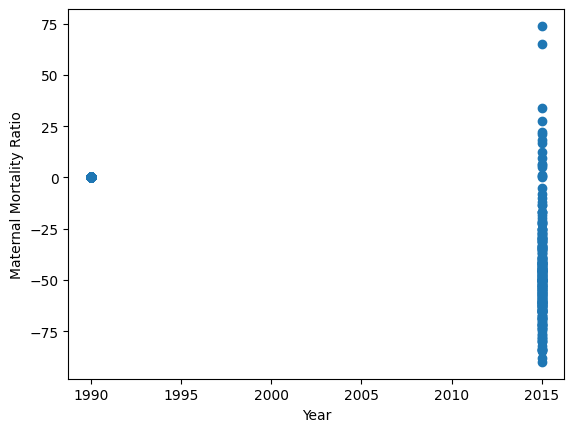

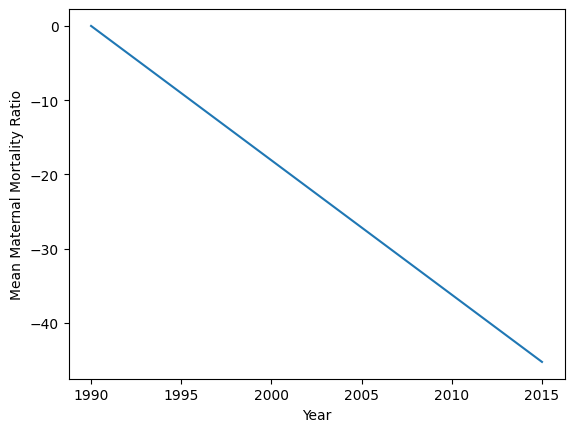

In [8]:
plt.scatter(df_clean[YEAR], df_clean[MMR])
plt.xlabel("Year")
plt.ylabel("Maternal Mortality Ratio")
plt.show()

yearly = df_clean.groupby(YEAR)[MMR].mean()

plt.plot(yearly.index, yearly.values)
plt.xlabel("Year")
plt.ylabel("Mean Maternal Mortality Ratio")
plt.show()


**Notes**  
Scatter shows spread; aggregation highlights broad trends.

**Limits**  
Pooling countries hides regional differences and causes.


## Closing

These recipes prioritize clarity, correctness, and awareness of data limits.
They are intended as starting points, not final analyses.


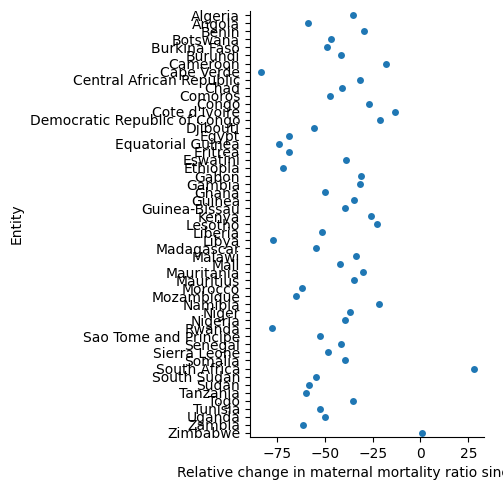

In [8]:
# Data visualization for the Asian overall Motality Change over the years using the seaborns catplot
sns.catplot(data=df_Africa, x="Relative change in maternal mortality ratio since 1990", y="Entity")